In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps

from sklearn import datasets #open source data analysis library, and the gold standard for Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder

import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
df_data = pd.read_csv('../data/CensusIncome/adult.data.csv',header=None)
df_data.columns= ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship',
                  'race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
# df.columns= df.columns.str.strip().str.lower()

df_test = pd.read_csv('../data/CensusIncome/adult.test.csv',header=None,skiprows=1)
df_test.columns= ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship',
                  'race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
# df_test.columns= df_test.columns.str.strip().str.lower()

In [3]:
df = df_data
df = df[df['occupation']!=' ?']
df_test = df_test[df_test['occupation']!=' ?']
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df_test['sex'] = df_test['sex'].map({' Male': 0, ' Female': 1})
df_test['income'] = df_test['income'].map({' <=50K.': 0, ' >50K.': 1})


df['sex'] = df['sex'].map({' Male': 0, ' Female': 1})
df['income'] = df['income'].map({' <=50K': 0, ' >50K': 1})
df

C:\Users\WindowJavier\AppData\Local\Temp\ipykernel_15128\2019106248.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].map({' Male': 0, ' Female': 1})
C:\Users\WindowJavier\AppData\Local\Temp\ipykernel_15128\2019106248.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income'] = df['income'].map({' <=50K': 0, ' >50K': 1})


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,1,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,1,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,0,0,20,United-States,0


In [5]:
df['income'].sum()

7650

In [6]:
# One-hot Encoding the Features
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()

encoded = one_hot.fit_transform(df[['occupation']])
df[one_hot.categories_[0]] = encoded.toarray()
encoded = one_hot.fit_transform(df_test[['occupation']])
df_test[one_hot.categories_[0]] = encoded.toarray()

encoded = one_hot.fit_transform(df[['race']])
df[one_hot.categories_[0]] = encoded.toarray()
encoded = one_hot.fit_transform(df_test[['race']])
df_test[one_hot.categories_[0]] = encoded.toarray()

encoded = one_hot.fit_transform(df[['education']])
df[one_hot.categories_[0]] = encoded.toarray()
encoded = one_hot.fit_transform(df_test[['education']])
df_test[one_hot.categories_[0]] = encoded.toarray()

encoded = one_hot.fit_transform(df[['marital-status']])
df[one_hot.categories_[0]] = encoded.toarray()
encoded = one_hot.fit_transform(df_test[['marital-status']])
df_test[one_hot.categories_[0]] = encoded.toarray()

encoded = one_hot.fit_transform(df[['workclass']])
df[one_hot.categories_[0]] = encoded.toarray()
encoded = one_hot.fit_transform(df_test[['workclass']])
df_test[one_hot.categories_[0]] = encoded.toarray()

encoded = one_hot.fit_transform(df[['relationship']])
df[one_hot.categories_[0]] = encoded.toarray()
encoded = one_hot.fit_transform(df_test[['relationship']])
df_test[one_hot.categories_[0]] = encoded.toarray()

df

C:\Users\WindowJavier\AppData\Local\Temp\ipykernel_15128\950481370.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[one_hot.categories_[0]] = encoded.toarray()
C:\Users\WindowJavier\AppData\Local\Temp\ipykernel_15128\950481370.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[one_hot.categories_[0]] = encoded.toarray()
C:\Users\WindowJavier\AppData\Local\Temp\ipykernel_15128\950481370.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

C:\Users\WindowJavier\AppData\Local\Temp\ipykernel_15128\950481370.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[one_hot.categories_[0]] = encoded.toarray()
C:\Users\WindowJavier\AppData\Local\Temp\ipykernel_15128\950481370.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[one_hot.categories_[0]] = encoded.toarray()
C:\Users\WindowJavier\AppData\Local\Temp\ipykernel_15128\950481370.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

C:\Users\WindowJavier\AppData\Local\Temp\ipykernel_15128\950481370.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[one_hot.categories_[0]] = encoded.toarray()
C:\Users\WindowJavier\AppData\Local\Temp\ipykernel_15128\950481370.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[one_hot.categories_[0]] = encoded.toarray()
C:\Users\WindowJavier\AppData\Local\Temp\ipykernel_15128\950481370.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
df = df.drop(['occupation','race', 'education', 'marital-status','workclass', 'relationship', 'native-country'],axis=1)
df_test = df_test.drop(['occupation','race', 'education', 'marital-status','workclass', 'relationship', 'native-country'],axis=1)

In [8]:
df.shape,df_test.shape

((30718, 63), (15315, 63))

In [9]:
df_rf=df
df_rf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30718 entries, 0 to 32560
Data columns (total 63 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     30718 non-null  int64  
 1   fnlwgt                  30718 non-null  int64  
 2   education-num           30718 non-null  int64  
 3   sex                     30718 non-null  int64  
 4   capital-gain            30718 non-null  int64  
 5   capital-loss            30718 non-null  int64  
 6   hours-per-week          30718 non-null  int64  
 7   income                  30718 non-null  int64  
 8    Adm-clerical           30718 non-null  float64
 9    Armed-Forces           30718 non-null  float64
 10   Craft-repair           30718 non-null  float64
 11   Exec-managerial        30718 non-null  float64
 12   Farming-fishing        30718 non-null  float64
 13   Handlers-cleaners      30718 non-null  float64
 14   Machine-op-inspct      30718 non-null

<AxesSubplot:>

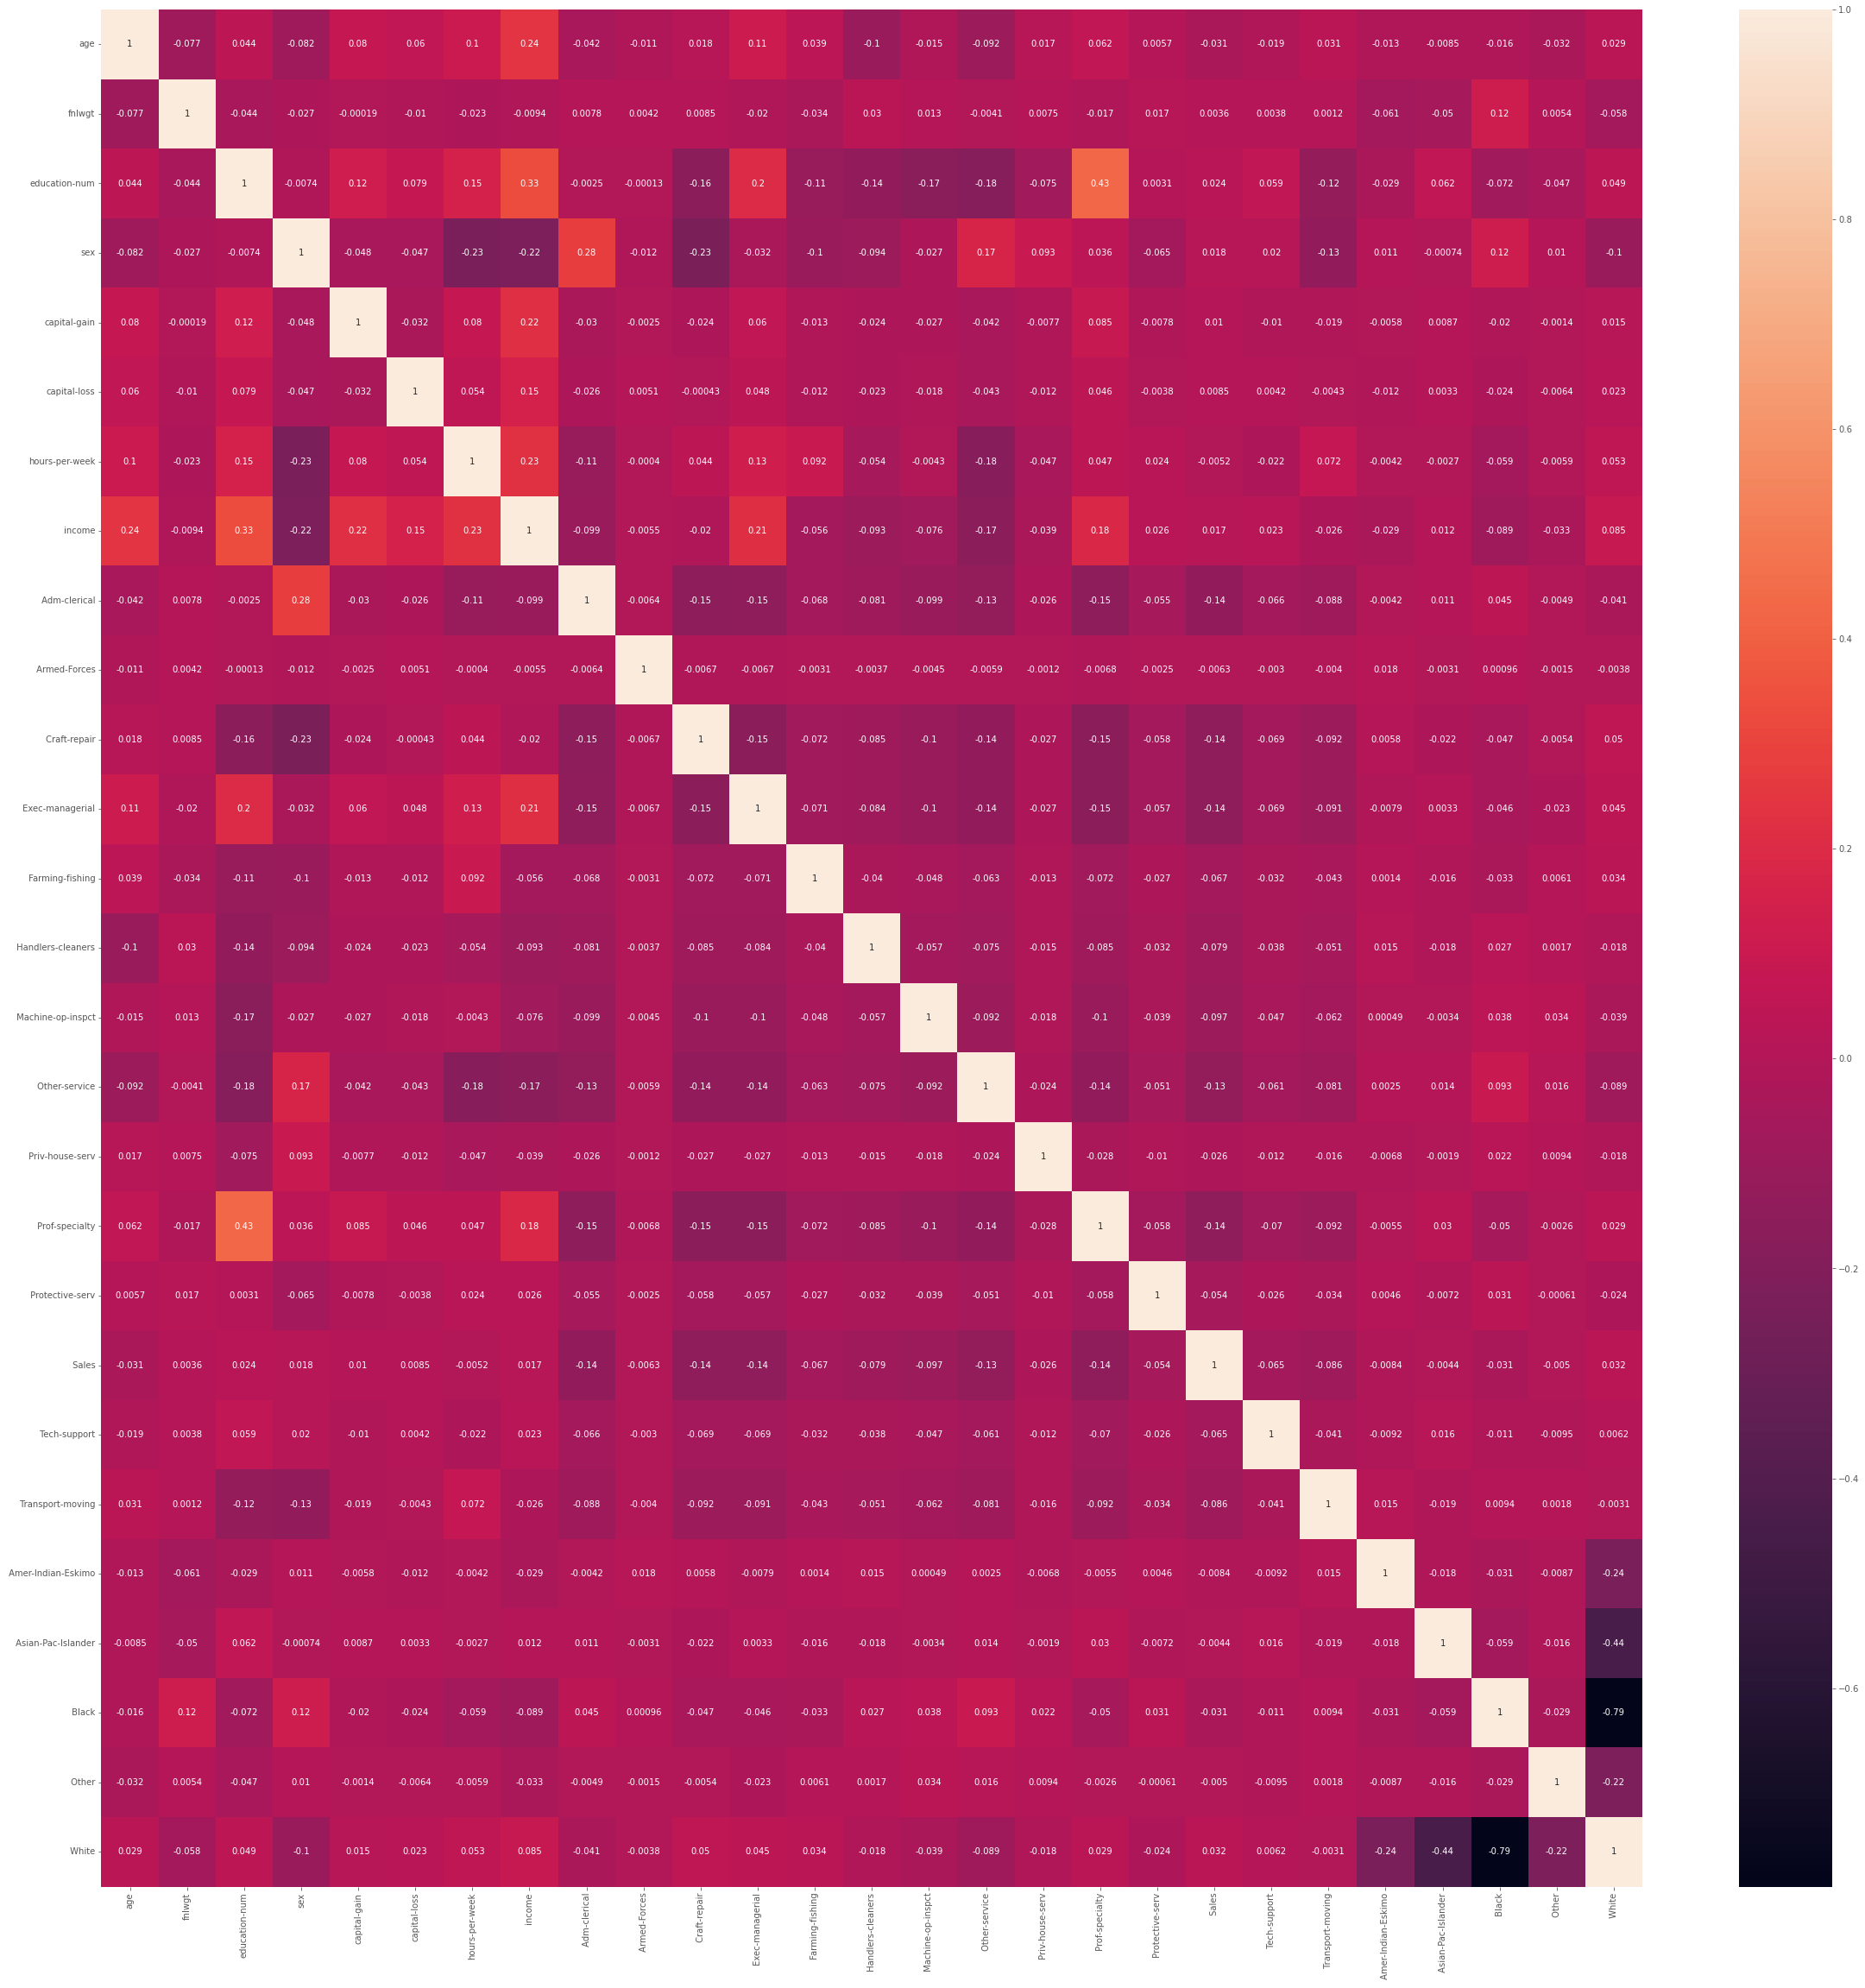

In [457]:
fig, ax = plt.subplots(figsize=(40, 40))
sns.heatmap(df_rf.corr(), annot=True)

In [10]:
features = df_rf
features_final = df_test

# Labels are the values we want to predict
labels = np.array(features['income'])
labels_final = np.array(features_final['income'])
# Remove the labels from the features  # axis 1 refers to the columns
features= features.drop('income', axis = 1)
features_final= features_final.drop('income', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
feature_list_final = list(features_final.columns)
# Convert to numpy array
features = np.array(features)
features_final = np.array(features_final)

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 20)

print('df Shape:', df_rf.shape)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)
df_rf.columns

df Shape: (30718, 63)
Training Features Shape: (23038, 62)
Training Labels Shape: (23038,)
Testing Features Shape: (7680, 62)
Testing Labels Shape: (7680,)


Index(['age', 'fnlwgt', 'education-num', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', ' Adm-clerical', ' Armed-Forces',
       ' Craft-repair', ' Exec-managerial', ' Farming-fishing',
       ' Handlers-cleaners', ' Machine-op-inspct', ' Other-service',
       ' Priv-house-serv', ' Prof-specialty', ' Protective-serv', ' Sales',
       ' Tech-support', ' Transport-moving', ' Amer-Indian-Eskimo',
       ' Asian-Pac-Islander', ' Black', ' Other', ' White', ' 10th', ' 11th',
       ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' Assoc-acdm',
       ' Assoc-voc', ' Bachelors', ' Doctorate', ' HS-grad', ' Masters',
       ' Preschool', ' Prof-school', ' Some-college', ' Divorced',
       ' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Widowed', ' Federal-gov',
       ' Local-gov', ' Private', ' Self-emp-inc', ' Self-emp-not-inc',
       ' State-gov', ' Without-pay', ' Husband', ' Not-in-family'

In [11]:
# define the model
randomforest_de = RandomForestClassifier()
#model = RandomForestRegressor()
# fit the model on the training dataset
randomforest_de.fit(train_features, train_labels)

RandomForestClassifier()

In [12]:
randomforest_ot = RandomForestClassifier(n_estimators=1000, max_depth=50, random_state = 42)
randomforest_ot.fit(train_features, train_labels)

prediction_train = randomforest_ot.predict(train_features)
print('Accuracy train data:',accuracy_score(prediction_train, train_labels))

prediction_test = randomforest_ot.predict(test_features)
print('Accuracy test data:',accuracy_score(prediction_test, test_labels))


Accuracy train data: 1.0
Accuracy test data: 0.8561197916666666


### Using KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier()
knn.fit(train_features, train_labels)

# training data
prediction_train_knn = knn.predict(train_features)
print('Accuracy train data:',accuracy_score(prediction_train_knn, train_labels))

# testing data
prediction_test_knn = knn.predict(test_features)
print('Accuracy test data:',accuracy_score(prediction_test_knn, test_labels))

Accuracy train data: 0.8281968920913274
Accuracy test data: 0.7615885416666667


### Using LogisticRegression

In [14]:
lg = LogisticRegression()
lg.fit(train_features, train_labels)

# training data
prediction_train_lg = lg.predict(train_features)
print('Accuracy train data:',accuracy_score(prediction_train_lg, train_labels))

# testing data
prediction_test_lg = lg.predict(test_features)
print('Accuracy test data:',accuracy_score(prediction_test_lg, test_labels))

Accuracy train data: 0.79381890789131
Accuracy test data: 0.78359375


### Other classifier

In [15]:
from sklearn.svm import LinearSVC
l_svc = LinearSVC()
l_svc.fit(train_features, train_labels)
# training data
prediction_train_l_svc = l_svc.predict(train_features)
print('Accuracy train data - LienarSVC:',accuracy_score(prediction_train_l_svc, train_labels))
# testing data
prediction_test_l_svc = l_svc.predict(test_features)
print('Accuracy test data - LienarSVC:',accuracy_score(prediction_test_l_svc, test_labels))

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(train_features, train_labels)
# training data
prediction_train_dtc = dtc.predict(train_features)
print('Accuracy train data - DecisionTree:',accuracy_score(prediction_train_dtc, train_labels))
# testing data
prediction_test_dtc = dtc.predict(test_features)
print('Accuracy test data - DecisionTree:',accuracy_score(prediction_test_dtc, test_labels))

from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(train_features, train_labels)
# training data
prediction_train_gauss = gauss.predict(train_features)
print('Accuracy train data - Gaussian:',accuracy_score(prediction_train_gauss, train_labels))
# testing data
prediction_test_gauss = gauss.predict(test_features)
print('Accuracy test data - Gaussian:',accuracy_score(prediction_test_gauss, test_labels))

C:\Users\WindowJavier\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy train data - LienarSVC: 0.7799722198107475
Accuracy test data - LienarSVC: 0.7729166666666667
Accuracy train data - DecisionTree: 1.0
Accuracy test data - DecisionTree: 0.8055989583333333
Accuracy train data - Gaussian: 0.7918656133344908
Accuracy test data - Gaussian: 0.77890625


# Testing the hyperparameters

In [16]:
# Test to max_samples
for i in range(1,11):
    # define the model
    model = RandomForestClassifier(max_samples=(i/10), random_state = 42)
    # fit the model on the training dataset
    model.fit(train_features, train_labels)
    # Use the forest's predict method on the training data
    predictions_train = model.predict(train_features)

    # Use the forest's predict method on the test data
    predictions_test = model.predict(test_features)
    print((i/10),'Accuracy_train_data:',accuracy_score(predictions_train, train_labels),
          '| Accuracy_test_data:',accuracy_score(predictions_test, test_labels))
print('finished')

0.1 Accuracy_train_data: 0.8839743033249414 | Accuracy_test_data: 0.8569010416666667
0.2 Accuracy_train_data: 0.9069363660039934 | Accuracy_test_data: 0.8567708333333334
0.3 Accuracy_train_data: 0.9295945828630957 | Accuracy_test_data: 0.8598958333333333
0.4 Accuracy_train_data: 0.948433023699974 | Accuracy_test_data: 0.855859375
0.5 Accuracy_train_data: 0.9656654223456898 | Accuracy_test_data: 0.8595052083333333
0.6 Accuracy_train_data: 0.9825939751714559 | Accuracy_test_data: 0.8584635416666667
0.7 Accuracy_train_data: 0.993923083601007 | Accuracy_test_data: 0.8583333333333333
0.8 Accuracy_train_data: 0.9989148363573227 | Accuracy_test_data: 0.8557291666666667
0.9 Accuracy_train_data: 0.9998263738171717 | Accuracy_test_data: 0.853515625
1.0 Accuracy_train_data: 1.0 | Accuracy_test_data: 0.8555989583333333
finished


In [17]:
# Test to max_feature
for i in range(1,12):
    # define the model
    if i == 11:
        model = RandomForestClassifier(random_state = 42)
    else:
        model = RandomForestClassifier(max_features=(i/10), random_state = 42)
    
    # fit the model on the training dataset
    model.fit(train_features, train_labels)
    # Use the forest's predict method on the training data
    predictions_train = model.predict(train_features)

    # Use the forest's predict method on the test data
    predictions_test = model.predict(test_features)
    print((i/10),'Accuracy_train_data:',accuracy_score(predictions_train, train_labels),
          '| Accuracy_test_data:',accuracy_score(predictions_test, test_labels))
print('finished')

0.1 Accuracy_train_data: 1.0 | Accuracy_test_data: 0.85390625
0.2 Accuracy_train_data: 1.0 | Accuracy_test_data: 0.8555989583333333
0.3 Accuracy_train_data: 1.0 | Accuracy_test_data: 0.8565104166666667
0.4 Accuracy_train_data: 1.0 | Accuracy_test_data: 0.85546875
0.5 Accuracy_train_data: 1.0 | Accuracy_test_data: 0.8540364583333333
0.6 Accuracy_train_data: 1.0 | Accuracy_test_data: 0.8524739583333333
0.7 Accuracy_train_data: 1.0 | Accuracy_test_data: 0.851953125
0.8 Accuracy_train_data: 1.0 | Accuracy_test_data: 0.8520833333333333
0.9 Accuracy_train_data: 1.0 | Accuracy_test_data: 0.8529947916666667
1.0 Accuracy_train_data: 1.0 | Accuracy_test_data: 0.8514322916666667
1.1 Accuracy_train_data: 1.0 | Accuracy_test_data: 0.8555989583333333
finished


In [18]:
# Test to n_estimators
for i in range(1,12):
    # define the model
    if i == 11:
        model = RandomForestClassifier(random_state = 42)
    else:
        model = RandomForestClassifier(n_estimators=(10*i**2), random_state = 42)
    
    # fit the model on the training dataset
    model.fit(train_features, train_labels)
    # Use the forest's predict method on the training data
    predictions_train = model.predict(train_features)

    # Use the forest's predict method on the test data
    predictions_test = model.predict(test_features)
    print((10*i**2),'Accuracy_train_data:',accuracy_score(predictions_train, train_labels),
          '| Accuracy_test_data:',accuracy_score(predictions_test, test_labels))
print('finished')

10 Accuracy_train_data: 0.9864571577393871 | Accuracy_test_data: 0.8444010416666666
40 Accuracy_train_data: 0.9990450559944439 | Accuracy_test_data: 0.8540364583333333
90 Accuracy_train_data: 1.0 | Accuracy_test_data: 0.8559895833333333
160 Accuracy_train_data: 1.0 | Accuracy_test_data: 0.8555989583333333
250 Accuracy_train_data: 1.0 | Accuracy_test_data: 0.85703125
360 Accuracy_train_data: 1.0 | Accuracy_test_data: 0.8571614583333333
490 Accuracy_train_data: 1.0 | Accuracy_test_data: 0.856640625
640 Accuracy_train_data: 1.0 | Accuracy_test_data: 0.85625
810 Accuracy_train_data: 1.0 | Accuracy_test_data: 0.8567708333333334
1000 Accuracy_train_data: 1.0 | Accuracy_test_data: 0.8559895833333333
1210 Accuracy_train_data: 1.0 | Accuracy_test_data: 0.8555989583333333
finished


In [19]:
# Test to max_depth
for i in range(1,12):
    # define the model
    if i == 11:
        model = RandomForestClassifier(random_state = 42)
    else:
        model = RandomForestClassifier(max_depth=4*i, random_state = 42)
    
    # fit the model on the training dataset
    model.fit(train_features, train_labels)
    # Use the forest's predict method on the training data
    predictions_train = model.predict(train_features)

    # Use the forest's predict method on the test data
    predictions_test = model.predict(test_features)
    print(4*i,'Accuracy_train_data:',accuracy_score(predictions_train, train_labels),
          '| Accuracy_test_data:',accuracy_score(predictions_test, test_labels))
print('finished')

4 Accuracy_train_data: 0.832711172844865 | Accuracy_test_data: 0.8295572916666667
8 Accuracy_train_data: 0.8512023613160865 | Accuracy_test_data: 0.8453125
12 Accuracy_train_data: 0.8732094799895824 | Accuracy_test_data: 0.8561197916666666
16 Accuracy_train_data: 0.9004687906936366 | Accuracy_test_data: 0.8604166666666667
20 Accuracy_train_data: 0.9346297421651185 | Accuracy_test_data: 0.86015625
24 Accuracy_train_data: 0.9641895997916485 | Accuracy_test_data: 0.8604166666666667
28 Accuracy_train_data: 0.9823335358972133 | Accuracy_test_data: 0.857421875
32 Accuracy_train_data: 0.9921434152270162 | Accuracy_test_data: 0.8571614583333333
36 Accuracy_train_data: 0.9978296727146454 | Accuracy_test_data: 0.8555989583333333
40 Accuracy_train_data: 0.9993923083601007 | Accuracy_test_data: 0.8553385416666667
44 Accuracy_train_data: 1.0 | Accuracy_test_data: 0.8555989583333333
finished


In [20]:
# For the best test
# max_features= 1/0.8
# n_estimators= 250/1000
# max_depth= 16

# Random forest with hyperparameters
# define the model
model_ot = RandomForestClassifier(n_estimators=250, max_depth=16, random_state = 42)
# fit the model on the training dataset
model_ot.fit(train_features, train_labels)
# Use the forest's predict method on the training data
prediction_train_ot = model_ot.predict(train_features)
print('Accuracy train data:',accuracy_score(train_labels, prediction_train_ot))

# Use the forest's predict method on the test data
prediction_test_ot = model_ot.predict(test_features)
print('Accuracy test data:',accuracy_score(test_labels, prediction_test_ot))

# Random forest default
# define the model
model_de = RandomForestClassifier(random_state = 42)
# fit the model on the training dataset
model_de.fit(train_features, train_labels)
# Use the forest's predict method on the training data
prediction_train_de = model_de.predict(train_features)
print('Accuracy train data:',accuracy_score(train_labels, prediction_train_de))

# Use the forest's predict method on the test data
prediction_test_de = model_de.predict(test_features)
print('Accuracy test data:',accuracy_score(test_labels, prediction_test_de))

Accuracy train data: 0.9004687906936366
Accuracy test data: 0.8595052083333333
Accuracy train data: 1.0
Accuracy test data: 0.8555989583333333


0.24811181526174148 0.24811181526174148


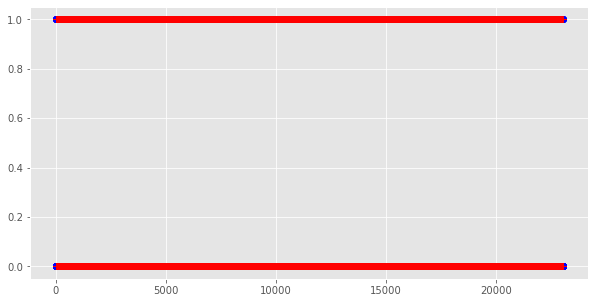

0.2518229166666667 0.20924479166666668


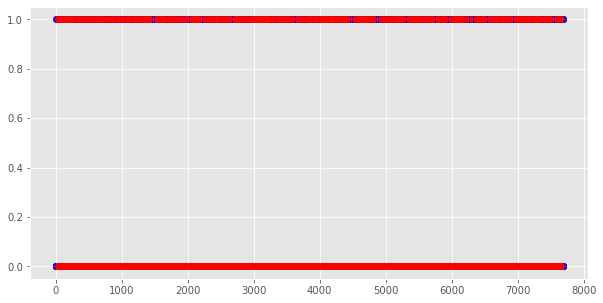

In [606]:
print(np.mean(train_labels),np.mean(prediction_train))
plt.figure(figsize=(10, 5))
plt.plot(train_labels, 'bo')
plt.plot(prediction_train, 'r+')
plt.show()

print(np.mean(test_labels),np.mean(prediction_test))
plt.figure(figsize=(10, 5))
plt.plot(test_labels,'bo')
plt.plot(prediction_test, 'r+')
plt.show()

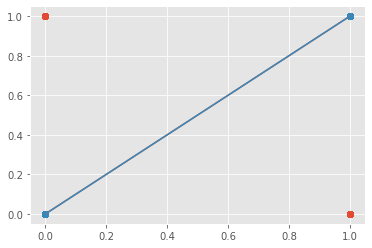

In [607]:
fx =[0,0.5,1]
xx =[0,0.5,1]
plt.plot(fx,xx)
#plt.scatter(x=test_labels, y=prediction_test*((prediction_test/np.mean(prediction_test))**0.4))
plt.scatter(x=test_labels, y=prediction_test)

plt.plot(fx,xx)
#plt.scatter(x=train_labels, y=prediction_train*((prediction_train/np.mean(prediction_train))**0.4))
plt.scatter(x=train_labels, y=prediction_train)

(array([5746.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1934.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

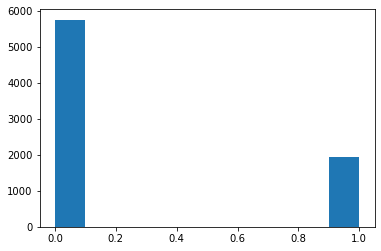

In [21]:
plt.hist(test_labels);

In [24]:
# Get numerical feature importances
importances = list(randomforest_de.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: fnlwgt               Importance: 0.17
Variable: age                  Importance: 0.15
Variable: capital-gain         Importance: 0.1
Variable: hours-per-week       Importance: 0.09
Variable: education-num        Importance: 0.07
Variable:  Married-civ-spouse  Importance: 0.07
Variable:  Husband             Importance: 0.04
Variable: capital-loss         Importance: 0.03
Variable:  Exec-managerial     Importance: 0.02
Variable:  Prof-specialty      Importance: 0.02
Variable:  Never-married       Importance: 0.02
Variable: sex                  Importance: 0.01
Variable:  Adm-clerical        Importance: 0.01
Variable:  Craft-repair        Importance: 0.01
Variable:  Farming-fishing     Importance: 0.01
Variable:  Other-service       Importance: 0.01
Variable:  Sales               Importance: 0.01
Variable:  Tech-support        Importance: 0.01
Variable:  Transport-moving    Importance: 0.01
Variable:  Black               Importance: 0.01
Variable:  White               Importance

In [25]:
from sklearn.inspection import permutation_importance
r = permutation_importance(randomforest_de, train_features, train_labels, n_repeats=30, random_state=42)#
for i in r.importances_mean.argsort()[::-1]:
#    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
               print('Measured with permutation:',
               (f"{feature_list[i]:24}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}"),)

Measured with permutation: age                     0.104 +/- 0.001
Measured with permutation: hours-per-week          0.079 +/- 0.001
Measured with permutation: fnlwgt                  0.074 +/- 0.001
Measured with permutation:  Married-civ-spouse     0.057 +/- 0.001
Measured with permutation: capital-gain            0.051 +/- 0.001
Measured with permutation: education-num           0.050 +/- 0.001
Measured with permutation:  Exec-managerial        0.028 +/- 0.001
Measured with permutation:  Husband                0.026 +/- 0.001
Measured with permutation:  Prof-specialty         0.020 +/- 0.000
Measured with permutation:  Private                0.018 +/- 0.001
Measured with permutation:  HS-grad                0.017 +/- 0.001
Measured with permutation: capital-loss            0.016 +/- 0.001
Measured with permutation:  Bachelors              0.015 +/- 0.000
Measured with permutation:  Craft-repair           0.015 +/- 0.000
Measured with permutation: sex                     0.014 +/- 0

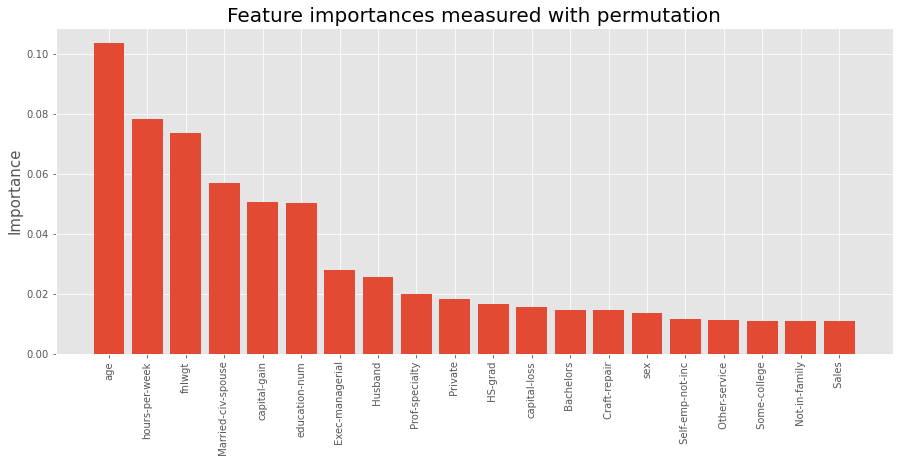

In [281]:
impo = pd.DataFrame()
impo['feature_list'] = (list(feature_list))
impo['value'] = list(r.importances_mean)
impo = impo.sort_values('value', ascending = False).head(20)
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15, 6));
ax.bar(height=impo['value'],x=impo['feature_list']);
ax.tick_params(axis='x', labelrotation = 90);
ax.set_ylabel('Importance', fontsize=15);
plt.title('Feature importances measured with permutation', fontsize=20); #plt.xlabel('Feature')
plt.savefig('../pictures/Feature_importances.jpg', bbox_inches='tight')

In [29]:
#confusion_matrix(test_labels, predictions, normalize='all'),sum(sum(confusion_matrix(test_labels, predictions)))

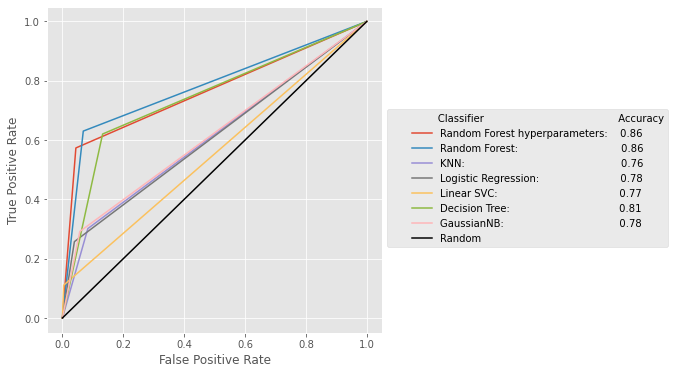

In [37]:
n = 10000
ratio = .95
n_0 = int((1-ratio) * n)
n_1 = int(ratio * n)

y = np.array([0] * n_0 + [1] * n_1)
y_proba = np.array([1]*n)
y_pred = y_proba > .5

fig, ax = plt.subplots(figsize=(6,6))
#Random Forest Hyperparameters
fpr, tpr, thresholds = roc_curve(test_labels, prediction_test_ot)
name = "Random Forest hyperparameters:    %s" % round(accuracy_score(prediction_test_ot, test_labels),2)
ax.plot(fpr, tpr, label=name)
#Random Fores default
fpr, tpr, thresholds = roc_curve(test_labels, prediction_test_de)
name = "Random Forest:                                 %s" % round(accuracy_score(prediction_test_de, test_labels),2)
ax.plot(fpr, tpr, label=name)

#KNN
fpr, tpr, thresholds = roc_curve(test_labels, prediction_test_knn)
name="KNN:                                                  %s" % round(accuracy_score(prediction_test_knn, test_labels),2)
ax.plot(fpr, tpr, label=name)
#LogisticRegression
fpr, tpr, thresholds = roc_curve(test_labels, prediction_test_lg)
name="Logistic Regression:                          %s" % round(accuracy_score(prediction_test_lg, test_labels),2)
ax.plot(fpr, tpr, label=name)
#Linear SVC
fpr, tpr, thresholds = roc_curve(test_labels, prediction_test_l_svc)
name = "Linear SVC:                                       %s" % round(accuracy_score(prediction_test_l_svc, test_labels),2)
ax.plot(fpr, tpr, label=name)
#DecisionTreeClassifier 
fpr, tpr, thresholds = roc_curve(test_labels, prediction_test_dtc)
name="Decision Tree:                                   %s" % round(accuracy_score(prediction_test_dtc, test_labels),2)
ax.plot(fpr, tpr, label=name)
#GaussianNB
fpr, tpr, thresholds = roc_curve(test_labels, prediction_test_gauss)
name="GaussianNB:                                     %s" % round(accuracy_score(prediction_test_gauss, test_labels),2)
ax.plot(fpr, tpr, label=name)

#random values
fpr1, tpr1, thresholds1 = roc_curve(y, y_proba);
ax.plot(fpr1, tpr1, label='Random',color='black');
ax.set_xlabel('False Positive Rate');
ax.set_ylabel('True Positive Rate');
ax.legend(title="               Classifier                                           Accuracy",bbox_to_anchor=(1,0.7));

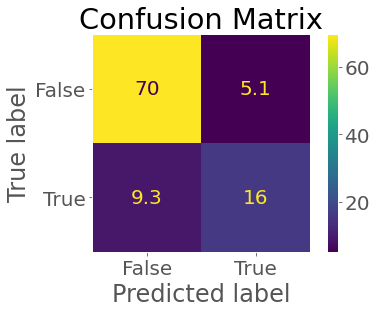

In [68]:
#c_matrix = confusion_matrix(test_labels, predictions)
c_matrix = np.around(100*confusion_matrix(test_labels, prediction_test_de, normalize='all'),1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels = [False, True])

cm_display.plot()
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

## Apply the classifiers in the test data set

In [79]:
prediction_final_ot = randomforest_ot.predict(features_final)
prediction_final_de = randomforest_de.predict(features_final)
prediction_final_knn = knn.predict(features_final)
prediction_final_lg = lg.predict(features_final)
prediction_final_l_svc = l_svc.predict(features_final)
prediction_final_dtc = dtc.predict(features_final)
prediction_final_gauss = gauss.predict(features_final)

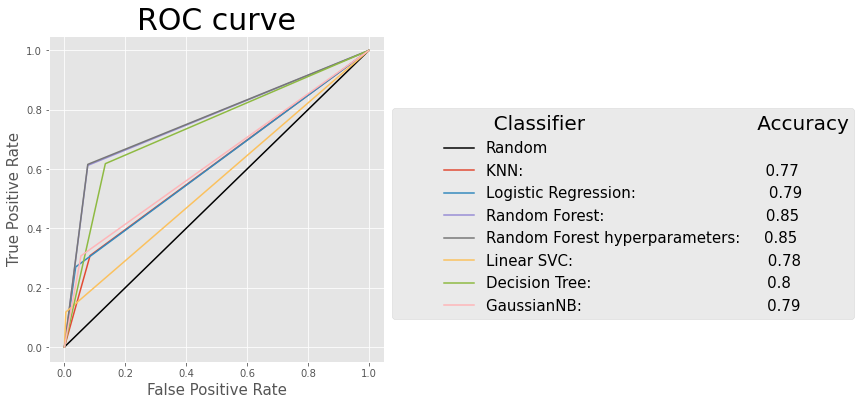

In [119]:
n = 10000
ratio = .95
n_0 = int((1-ratio) * n)
n_1 = int(ratio * n)

y = np.array([0] * n_0 + [1] * n_1)
y_proba = np.array([1]*n)
y_pred = y_proba > .5

fig, ax = plt.subplots(figsize=(6,6))
plt.rcParams.update({'font.size': 10})
#random values
fpr1, tpr1, thresholds1 = roc_curve(y, y_proba);
ax.plot(fpr1, tpr1, label='Random',color='black');
#KNN
fpr, tpr, thresholds = roc_curve(labels_final, prediction_final_knn)
name="KNN:                                                   %s" % round(accuracy_score(prediction_final_knn, labels_final),2)
ax.plot(fpr, tpr, label=name)
#LogisticRegression
fpr, tpr, thresholds = roc_curve(labels_final, prediction_final_lg)
name="Logistic Regression:                            %s" % round(accuracy_score(prediction_final_lg, labels_final),2)
ax.plot(fpr, tpr, label=name)
#Random Fores default
fpr, tpr, thresholds = roc_curve(labels_final, prediction_final_de)
name = "Random Forest:                                  %s" % round(accuracy_score(prediction_final_de, labels_final),2)
ax.plot(fpr, tpr, label=name)
#Random Forest Hyperparameters
fpr, tpr, thresholds = roc_curve(labels_final, prediction_final_ot)
name = "Random Forest hyperparameters:     %s" % round(accuracy_score(prediction_final_ot, labels_final),2)
ax.plot(fpr, tpr, label=name)

#Linear SVC
fpr, tpr, thresholds = roc_curve(labels_final, prediction_final_l_svc)
name = "Linear SVC:                                         %s" % round(accuracy_score(prediction_final_l_svc, labels_final),2)
ax.plot(fpr, tpr, label=name)
#DecisionTreeClassifier 
fpr, tpr, thresholds = roc_curve(labels_final, prediction_final_dtc)
name="Decision Tree:                                     %s" % round(accuracy_score(prediction_final_dtc, labels_final),2)
ax.plot(fpr, tpr, label=name)
#GaussianNB
fpr, tpr, thresholds = roc_curve(labels_final, prediction_final_gauss)
name="GaussianNB:                                       %s" % round(accuracy_score(prediction_final_gauss, labels_final),2)
ax.plot(fpr, tpr, label=name)

ax.set_title('ROC curve',fontsize=30);
ax.set_xlabel('False Positive Rate',fontsize=15);
ax.set_ylabel('True Positive Rate',fontsize=15);
ax.legend(title="               Classifier                           Accuracy",
          bbox_to_anchor=(1,0.8),fontsize=15,title_fontsize=20);
fig.savefig('../pictures/ROC_curve.png')

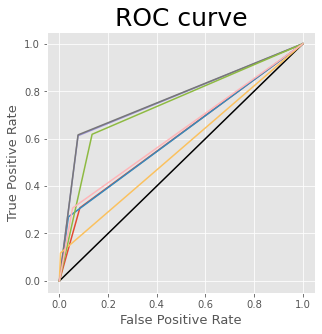

In [120]:
n = 10000
ratio = .95
n_0 = int((1-ratio) * n)
n_1 = int(ratio * n)

y = np.array([0] * n_0 + [1] * n_1)
y_proba = np.array([1]*n)
y_pred = y_proba > .5

fig, ax = plt.subplots(figsize=(4.8,4.8))
#fig, ax = plt.subplots(figsize=(6,6))
plt.rcParams.update({'font.size': 10})
#random values
fpr1, tpr1, thresholds1 = roc_curve(y, y_proba);
ax.plot(fpr1, tpr1, label='Random',color='black');
#KNN
fpr, tpr, thresholds = roc_curve(labels_final, prediction_final_knn)
name="KNN:                                                   %s" % round(accuracy_score(prediction_final_knn, labels_final),2)
ax.plot(fpr, tpr, label=name)
#LogisticRegression
fpr, tpr, thresholds = roc_curve(labels_final, prediction_final_lg)
name="Logistic Regression:                            %s" % round(accuracy_score(prediction_final_lg, labels_final),2)
ax.plot(fpr, tpr, label=name)
#Random Fores default
fpr, tpr, thresholds = roc_curve(labels_final, prediction_final_de)
name = "Random Forest:                                  %s" % round(accuracy_score(prediction_final_de, labels_final),2)
ax.plot(fpr, tpr, label=name)
#Random Forest Hyperparameters
fpr, tpr, thresholds = roc_curve(labels_final, prediction_final_ot)
name = "Random Forest hyperparameters:     %s" % round(accuracy_score(prediction_final_ot, labels_final),2)
ax.plot(fpr, tpr, label=name)

#Linear SVC
fpr, tpr, thresholds = roc_curve(labels_final, prediction_final_l_svc)
name = "Linear SVC:                                         %s" % round(accuracy_score(prediction_final_l_svc, labels_final),2)
ax.plot(fpr, tpr, label=name)
#DecisionTreeClassifier 
fpr, tpr, thresholds = roc_curve(labels_final, prediction_final_dtc)
name="Decision Tree:                                     %s" % round(accuracy_score(prediction_final_dtc, labels_final),2)
ax.plot(fpr, tpr, label=name)
#GaussianNB
fpr, tpr, thresholds = roc_curve(labels_final, prediction_final_gauss)
name="GaussianNB:                                       %s" % round(accuracy_score(prediction_final_gauss, labels_final),2)
ax.plot(fpr, tpr, label=name)

ax.set_title('ROC curve',fontsize=25);
ax.set_xlabel('False Positive Rate',fontsize=13);
ax.set_ylabel('True Positive Rate',fontsize=13);
# ax.legend(title="               Classifier                           Accuracy",
#           bbox_to_anchor=(1,0.8),fontsize=15,title_fontsize=20);
fig.savefig('../pictures/ROC_curve_all.png')

<Figure size 504x432 with 0 Axes>

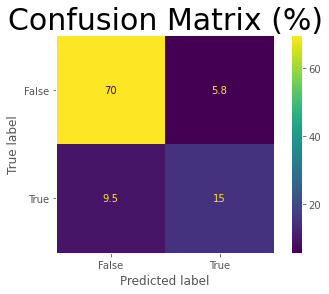

In [121]:
#c_matrix = confusion_matrix(test_labels, predictions)
c_matrix = np.around(100*confusion_matrix(labels_final, prediction_final_ot, normalize='all'),1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels = [False, True])

fig = plt.figure(figsize=(7, 6));
cm_display.plot();
plt.title('Confusion Matrix (%)', fontsize=30);
# plt.xlabel('Predicted label', fontsize=20);
# plt.ylabel('True label', fontsize=20);
plt.rcParams.update({'font.size': 20})
plt.grid(False);
plt.savefig('../pictures/ConfusionMatrix.jpg')
plt.show()


# Just using some categories

In [122]:
df_data_c = pd.read_csv('../data/CensusIncome/adult.data.csv',header=None)
df_data_c.columns= ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship',
                  'race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

df_test_c = pd.read_csv('../data/CensusIncome/adult.test.csv',header=None,skiprows=1)
df_test_c.columns= ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship',
                  'race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
df_rf_c = df_data_c
df_rf_c = df_rf_c[df_rf_c['occupation']!=' ?']
df_test_c = df_test_c[df_test_c['occupation']!=' ?']

df_rf_c = df_rf_c[['age','education-num','hours-per-week', 'sex','income','race']]
df_test_c = df_test_c[['age','education-num','hours-per-week', 'sex','income','race']]

df_test_c['sex'] = df_test_c['sex'].map({' Male': 0, ' Female': 1})
df_test_c['income'] = df_test_c['income'].map({' <=50K.': 0, ' >50K.': 1})

df_rf_c['sex'] = df_rf_c['sex'].map({' Male': 0, ' Female': 1})
df_rf_c['income'] = df_rf_c['income'].map({' <=50K': 0, ' >50K': 1})

# One-hot Encoding the Features
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()

encoded = one_hot.fit_transform(df_rf_c[['race']])
df_rf_c[one_hot.categories_[0]] = encoded.toarray()
encoded = one_hot.fit_transform(df_test_c[['race']])
df_test_c[one_hot.categories_[0]] = encoded.toarray()

df_rf_c = df_rf_c.drop(['race'],axis=1)
df_test_c = df_test_c.drop(['race'],axis=1)

df_rf_c

,age,education-num,hours-per-week,sex,income,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,39,13,40,0,0,0.0,0.0,0.0,0.0,1.0
1,50,13,13,0,0,0.0,0.0,0.0,0.0,1.0
2,38,9,40,0,0,0.0,0.0,0.0,0.0,1.0
3,53,7,40,0,0,0.0,0.0,1.0,0.0,0.0
4,28,13,40,1,0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
32556,27,12,38,1,0,0.0,0.0,0.0,0.0,1.0
32557,40,9,40,0,1,0.0,0.0,0.0,0.0,1.0
32558,58,9,40,1,0,0.0,0.0,0.0,0.0,1.0
32559,22,9,20,0,0,0.0,0.0,0.0,0.0,1.0


In [123]:
features_c = df_rf_c
features_final_c = df_test_c

# Labels are the values we want to predict
labels_c = np.array(features_c['income'])
labels_final_c = np.array(features_final_c['income'])
# Remove the labels from the features  # axis 1 refers to the columns
features_c= features_c.drop('income', axis = 1)
features_final_c= features_final_c.drop('income', axis = 1)
# Saving feature names for later use
features_c_list = list(features_c.columns)
features_final_c_list = list(features_final_c.columns)
# Convert to numpy array
features_c = np.array(features_c)
features_final_c = np.array(features_final_c)

train_features_c, test_features_c, train_labels_c, test_labels_c = train_test_split(features_c, labels_c, test_size = 0.25, random_state = 20)

print('df_rf_c Shape:', df_rf_c.shape)
print('Training Features Shape:', train_features_c.shape)
print('Training Labels Shape:', train_labels_c.shape)
print('Testing Features Shape:', test_features_c.shape)
print('Testing Labels Shape:', test_labels_c.shape)

df_rf_c Shape: (30718, 10)
Training Features Shape: (23038, 9)
Training Labels Shape: (23038,)
Testing Features Shape: (7680, 9)
Testing Labels Shape: (7680,)


In [124]:
model_train_c = RandomForestClassifier(random_state = 42)
model_train_c.fit(train_features_c, train_labels_c)

prediction_train_c = model_train_c.predict(train_features_c)
print('Accuracy train data:',accuracy_score(prediction_train_c, train_labels_c))

prediction_test_c = model_train_c.predict(test_features_c)
print('Accuracy test data:',accuracy_score(prediction_test_c, test_labels_c))


Accuracy train data: 0.8725149752582689
Accuracy test data: 0.7799479166666666


In [125]:
# Test to max_samples
for i in range(1,11):
    # define the model
    model_c = RandomForestClassifier(max_samples=(i/10), random_state = 42)
    # fit the model on the training dataset
    model_c.fit(train_features_c, train_labels_c)
    # Use the forest's predict method on the training data
    predictions_train_c = model_c.predict(train_features_c)

    # Use the forest's predict method on the test data
    predictions_test_c = model_c.predict(test_features_c)
    print((i/10),'Accuracy_train_data:',accuracy_score(predictions_train_c, train_labels_c),
          '| Accuracy_test_data:',accuracy_score(predictions_test_c, test_labels_c))
print('finished')

0.1 Accuracy_train_data: 0.8236826113377897 | Accuracy_test_data: 0.8020833333333334
0.2 Accuracy_train_data: 0.8346644674016842 | Accuracy_test_data: 0.7973958333333333
0.3 Accuracy_train_data: 0.8429985241774459 | Accuracy_test_data: 0.7923177083333334
0.4 Accuracy_train_data: 0.8493358798506815 | Accuracy_test_data: 0.7924479166666667
0.5 Accuracy_train_data: 0.8562809271638163 | Accuracy_test_data: 0.789453125
0.6 Accuracy_train_data: 0.8623578435628093 | Accuracy_test_data: 0.7852864583333333
0.7 Accuracy_train_data: 0.8682611337789738 | Accuracy_test_data: 0.783984375
0.8 Accuracy_train_data: 0.8712561854327633 | Accuracy_test_data: 0.78125
0.9 Accuracy_train_data: 0.8723847556211477 | Accuracy_test_data: 0.78203125
1.0 Accuracy_train_data: 0.8725149752582689 | Accuracy_test_data: 0.7799479166666666
finished


In [126]:
# Test to max_features
for i in range(1,12):
    # define the model
    if i == 11:
        model_c = RandomForestClassifier(random_state = 42)
    else:
        model_c = RandomForestClassifier(max_features=(i/10), random_state = 42)
    
    # fit the model on the training dataset
    model_c.fit(train_features_c, train_labels_c)
    # Use the forest's predict method on the training data
    predictions_train_c = model_c.predict(train_features_c)

    # Use the forest's predict method on the test data
    predictions_test_c = model_c.predict(test_features_c)
    print((i/10),'Accuracy_train_data:',accuracy_score(predictions_train_c, train_labels_c),
          '| Accuracy_test_data:',accuracy_score(predictions_test_c, test_labels_c))
print('finished')

0.1 Accuracy_train_data: 0.8725149752582689 | Accuracy_test_data: 0.7817708333333333
0.2 Accuracy_train_data: 0.8725149752582689 | Accuracy_test_data: 0.7817708333333333
0.3 Accuracy_train_data: 0.8725149752582689 | Accuracy_test_data: 0.7807291666666667
0.4 Accuracy_train_data: 0.8725149752582689 | Accuracy_test_data: 0.7799479166666666
0.5 Accuracy_train_data: 0.8725149752582689 | Accuracy_test_data: 0.7815104166666667
0.6 Accuracy_train_data: 0.8725149752582689 | Accuracy_test_data: 0.7799479166666666
0.7 Accuracy_train_data: 0.8725149752582689 | Accuracy_test_data: 0.780859375
0.8 Accuracy_train_data: 0.8725149752582689 | Accuracy_test_data: 0.780078125
0.9 Accuracy_train_data: 0.8725149752582689 | Accuracy_test_data: 0.7805989583333334
1.0 Accuracy_train_data: 0.8725149752582689 | Accuracy_test_data: 0.7790364583333333
1.1 Accuracy_train_data: 0.8725149752582689 | Accuracy_test_data: 0.7799479166666666
finished


In [127]:
# Test to n_estimators
for i in range(1,12):
    # define the model
    if i == 11:
        model_c = RandomForestClassifier(random_state = 42)
    else:
        model_c = RandomForestClassifier(n_estimators=(10*i**2), random_state = 42)
    
    # fit the model on the training dataset
    model_c.fit(train_features_c, train_labels_c)
    # Use the forest's predict method on the training data
    predictions_train_c = model_c.predict(train_features_c)

    # Use the forest's predict method on the test data
    predictions_test_c = model_c.predict(test_features_c)
    print((10*i**2),'Accuracy_train_data:',accuracy_score(predictions_train_c, train_labels_c),
          '| Accuracy_test_data:',accuracy_score(predictions_test_c, test_labels_c))
print('finished')

10 Accuracy_train_data: 0.865526521399427 | Accuracy_test_data: 0.7819010416666666
40 Accuracy_train_data: 0.87160343779842 | Accuracy_test_data: 0.7809895833333333
90 Accuracy_train_data: 0.8723847556211477 | Accuracy_test_data: 0.7787760416666667
160 Accuracy_train_data: 0.8725149752582689 | Accuracy_test_data: 0.780078125
250 Accuracy_train_data: 0.8725149752582689 | Accuracy_test_data: 0.7807291666666667
360 Accuracy_train_data: 0.8725149752582689 | Accuracy_test_data: 0.7805989583333334
490 Accuracy_train_data: 0.8725149752582689 | Accuracy_test_data: 0.78046875
640 Accuracy_train_data: 0.8725149752582689 | Accuracy_test_data: 0.7821614583333333
810 Accuracy_train_data: 0.8725149752582689 | Accuracy_test_data: 0.7809895833333333
1000 Accuracy_train_data: 0.8725149752582689 | Accuracy_test_data: 0.78203125
1210 Accuracy_train_data: 0.8725149752582689 | Accuracy_test_data: 0.7799479166666666
finished


In [128]:
# Test to max_depth
for i in range(1,12):
    # define the model
    if i == 11:
        model_c = RandomForestClassifier(random_state = 42)
    else:
        model_c = RandomForestClassifier(max_depth=4*i, random_state = 42)
    
    # fit the model on the training dataset
    model_c.fit(train_features_c, train_labels_c)
    # Use the forest's predict method on the training data
    predictions_train_c = model_c.predict(train_features_c)

    # Use the forest's predict method on the test data
    predictions_test_c = model_c.predict(test_features_c)
    print(4*i,'Accuracy_train_data:',accuracy_score(predictions_train_c, train_labels_c),
          '| Accuracy_test_data:',accuracy_score(predictions_test_c, test_labels_c))
print('finished')

4 Accuracy_train_data: 0.8031079086726278 | Accuracy_test_data: 0.8044270833333333
8 Accuracy_train_data: 0.8087507596145499 | Accuracy_test_data: 0.8052083333333333
12 Accuracy_train_data: 0.8301067801024394 | Accuracy_test_data: 0.80390625
16 Accuracy_train_data: 0.8605347686431114 | Accuracy_test_data: 0.7915364583333333
20 Accuracy_train_data: 0.8716902508898342 | Accuracy_test_data: 0.7825520833333334
24 Accuracy_train_data: 0.8725149752582689 | Accuracy_test_data: 0.7811197916666667
28 Accuracy_train_data: 0.8725149752582689 | Accuracy_test_data: 0.7811197916666667
32 Accuracy_train_data: 0.8725149752582689 | Accuracy_test_data: 0.780078125
36 Accuracy_train_data: 0.8725149752582689 | Accuracy_test_data: 0.7802083333333333
40 Accuracy_train_data: 0.8725149752582689 | Accuracy_test_data: 0.7799479166666666
44 Accuracy_train_data: 0.8725149752582689 | Accuracy_test_data: 0.7799479166666666
finished


In [129]:
# max_samples = 0.1
# max_features = default
# n_estimators = 640
# max_depth = 8-4
model_train_c = RandomForestClassifier(max_samples = 0.5, n_estimators = 30,max_depth = 8, random_state = 42)
model_train_c.fit(train_features_c, train_labels_c)

prediction_train_c = model_train_c.predict(train_features_c)
print('Accuracy train data:',accuracy_score(prediction_train_c, train_labels_c))

prediction_test_c = model_train_c.predict(test_features_c)
print('Accuracy test data:',accuracy_score(prediction_test_c, test_labels_c))

prediction_final_c = model_train_c.predict(features_final_c)
print('Accuracy test data:',accuracy_score(prediction_final_c, labels_final_c))

Accuracy train data: 0.8090546054344995
Accuracy test data: 0.8061197916666667
Accuracy test data: 0.8026118184786157


<Figure size 504x432 with 0 Axes>

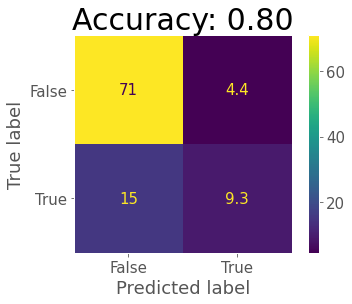

In [280]:
c_matrix = np.around(100*confusion_matrix(labels_final_c, prediction_final_c, normalize='all'),1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels = [False, True])

fig = plt.figure(figsize=(7, 6));
cm_display.plot();
plt.title('Accuracy: 0.80', fontsize=30);
# plt.xlabel('Predicted label', fontsize=20);
# plt.ylabel('True label', fontsize=20);
plt.rcParams.update({'font.size': 20})
plt.grid(False);
plt.savefig('../pictures/ConfusionMatrix_final.jpg', bbox_inches='tight')
plt.show()

In [146]:
j = [[35,  9, 60,  0,0,0,0,1,0],[35,  9, 60,  1,0,0,0,1,0],[35,  9, 60,  1,0,0,0,0,1],[35,  9, 60,  0,0,0,0,0,1]]
pre_j1 = model_train_c.predict(j)
print('                   |          for me           | Woman | Woman-White | Man-White')
print('Education          | Prediction | Hour-per-week')
print('Finish High-School -    ',pre_j1[0],'          60        |  60',pre_j1[1],'|  60',pre_j1[2],'  |  60',pre_j1[3])
j = [[35,  13, 48,  0,0,0,0,1,0],[35,  13, 60,  1,0,0,0,1,0],[35,  13, 60,  1,0,0,0,0,1],[35,  13, 40,  0,0,0,0,0,1]]
pre_j2 = model_train_c.predict(j)
print('Bachelor Degree    -    ',pre_j2[0],'          48        |  60',pre_j2[1],'|  60',pre_j2[2],'  |  40',pre_j2[3])
j = [[35,  14, 44,  0,0,0,0,1,0],[35,  14, 54,  1,0,0,0,1,0],[35,  14, 58,  14,0,0,0,0,1],[35,  14, 36,  0,0,0,0,0,1]]
pre_j3 = model_train_c.predict(j)
print('Master             -    ',pre_j3[0],'          44        |  54',pre_j3[1],'|  58',pre_j3[2],'  |  36',pre_j3[3])
j = [[34,  15, 32,  0,0,0,0,1,0],[35,  15, 45,  1,0,0,0,1,0],[35,  15, 43,  15,0,0,0,0,1],[35,  15, 23,  0,0,0,0,0,1]]
pre_j4 = model_train_c.predict(j)
print('Today              -    ',pre_j4[0],'          32        |  45',pre_j4[1],'|  43',pre_j4[2],'  |  23',pre_j4[3])
j = [[34,  16, 0,  0,0,0,0,1,0],[35,  16, 0,  1,0,0,0,1,0],[35,  16, 0,  15,0,0,0,0,1],[35,  16, 0,  0,0,0,0,0,1]]
pre_j5 = model_train_c.predict(j)
print('Phd                -    ',pre_j4[0],'          0         |  0 ',pre_j4[1],'|  0 ',pre_j4[2],'  |  0',pre_j4[3])

# df_pre_j=pd.DataFrame()
#df_pre_j.columns= ['Education','Hour-per-week\n for me','Hour-per-week\n Woman','Hour-per-week\n Woman-White''Hour-per-week\n Man-White']
# df_pre_j['Education']=['Finish High-School','Bachelor Degree','Master','Nowaday']
# df_pre_j['Hour-per-week - for me']=[60,48,44,32]
# df_pre_j['(pre)']=[pre_j1[0],pre_j2[0],pre_j3[0],pre_j4[0]]
# df_pre_j['Hour-per-week - Woman']=[60,60,54,45]
# df_pre_j['(pre)']=[pre_j1[1],pre_j2[1],pre_j3[1],pre_j4[1]]
# df_pre_j

                   |          for me           | Woman | Woman-White | Man-White
Education          | Prediction | Hour-per-week
Finish High-School -     0           60        |  60 0 |  60 0   |  60 0
Bachelor Degree    -     1           48        |  60 0 |  60 0   |  40 1
Master             -     1           44        |  54 1 |  58 1   |  36 1
Today              -     1           32        |  45 1 |  43 1   |  23 1
Phd                -     1           0         |  0  1 |  0  1   |  0 1


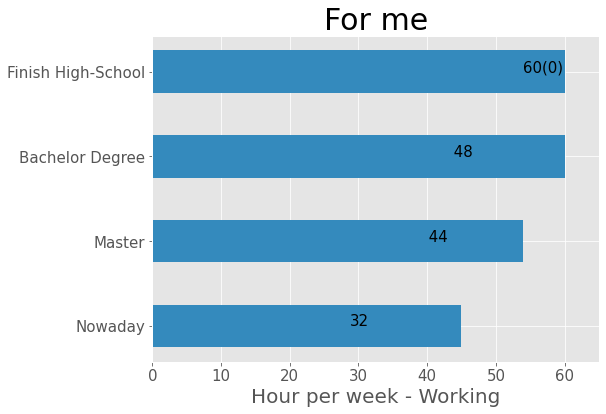

In [201]:
y=['Nowaday','Master','Bachelor Degree','Finish High-School']
x=[32,44,48,60]
nx=['32',' 44',' 48','60(0)']
x_1=[45,54,60,60]
nx_1=['45',' 54','60(0)','60(0)']
x_2=[23,36,40,60]
nx_2=['23',' 36',' 40','60(0)']


fig = plt.figure(figsize=(8, 6));
plt.rcParams.update({'font.size': 15})
plt.barh(y,x,height=0.5); #, color='red'
plt.barh(y,x_1,height=0.5);
plt.title('For me', fontsize=30);
plt.xlabel('Hour per week - Working', fontsize=20);
plt.xlim([0,65]);
plt.xticks([0,10,20,30,40,50,60]);

for i in range(len(x)):
    plt.text(x[i]*0.9,y[i],nx[i])
        
#plt.grid(axis='x', linestyle='--');
#plt.savefig('../pictures/Age-3.jpg')

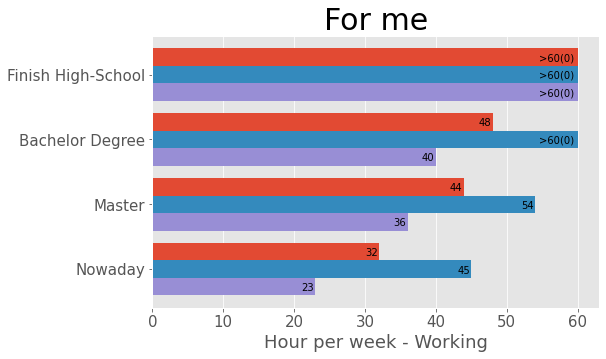

In [296]:
N = 4
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 17})

x=[32,44,48,60]
nx=['32',' 44',' 48','60(0)']
rects1 = ax.barh(ind+width*2, x, width) #, color='r'
x_1=[45,54,60,60]
nx_1=['45',' 54','60(0)','60(0)']
rects2 = ax.barh(ind+width, x_1, width) #, color='g'
x_2=[23,36,40,60]
nx_2=['23',' 36',' 40','60(0)']
rects3 = ax.barh(ind, x_2, width) #, color='b'
ax.set_title('For me', fontsize=30);
ax.set_xlabel('Hour per week - Working', fontsize=18)
ax.set_yticks(ind+width)
ax.set_yticklabels( ('Nowaday','Master','Bachelor Degree','Finish High-School') )
ax.grid(axis='y');

def autolabel(rects):
    for rect in rects:
        h = rect.get_width()
        if h<60:
            text = str(h)
            a=1.1
        else:
            text='>60(0)'
            a=3
        #print(rect,rect.get_y(),rect.get_x(),rect.get_width(),rect.get_height())
        ax.text(h-a,rect.get_y()+0.04, text,ha='center', va='bottom',fontsize=10)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


plt.show()
fig.savefig('../pictures/hours.jpg', bbox_inches='tight')

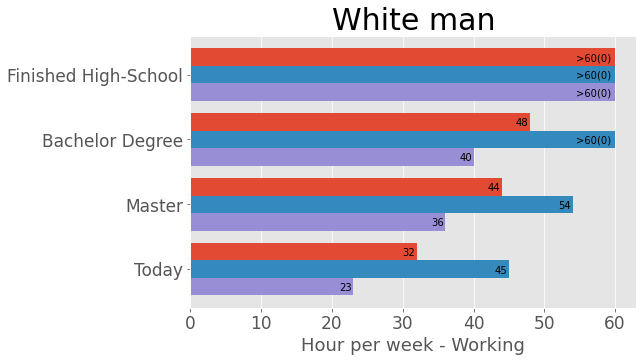

In [327]:
N = 4
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 17})

#x=[32,44,48,60]
x=[32,44,48,60]
nx=['32',' 44',' 48','60(0)']
rects1 = ax.barh(ind+width*2, x, width) #, color='r'
x_1=[45,54,60,60]
#x_1=[0,0,0,0]
nx_1=['45',' 54','60(0)','60(0)']
rects2 = ax.barh(ind+width, x_1, width) #, color='g'
x_2=[23,36,40,60]
#x_2=[0,0,0,0]
nx_2=['23',' 36',' 40','60(0)']
rects3 = ax.barh(ind, x_2, width) #, color='b'
#ax.set_title('For me', fontsize=30);
#ax.set_title('Woman', fontsize=30);
ax.set_title('White man', fontsize=30);
ax.set_xlabel('Hour per week - Working', fontsize=18)
ax.set_yticks(ind+width)
ax.set_yticklabels( ('Today','Master','Bachelor Degree','Finished High-School') )
ax.grid(axis='y');

def autolabel(rects):
    for rect in rects:
        h = rect.get_width()
        if h<60:
            text = str(h)
            a=1.1
        if h < 5:
            text = ''
            a=0
        if h>=60:
            text='>60(0)'
            a=3
        #print(rect,rect.get_y(),rect.get_x(),rect.get_width(),rect.get_height())
        ax.text(h-a,rect.get_y()+0.04, text,ha='center', va='bottom',fontsize=10)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


plt.show()
fig.savefig('../pictures/hours6.jpg', bbox_inches='tight')